In [2]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="123456789",
  database="linear_regression"
)

mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM daily_website_visitor")

myresult = mycursor.fetchall()


[(1, 'Sunday', 1, '2014-09-14', 2146, 1582, 1430, 152), (2, 'Monday', 2, '2014-09-15', 3621, 2528, 2297, 231), (3, 'Tuesday', 3, '2014-09-16', 3698, 2630, 2352, 278), (4, 'Wednesday', 4, '2014-09-17', 3667, 2614, 2327, 287), (5, 'Thursday', 5, '2014-09-18', 3316, 2366, 2130, 236), (6, 'Friday', 6, '2014-09-19', 2815, 1863, 1622, 241), (7, 'Saturday', 7, '2014-09-20', 1658, 1118, 985, 133), (8, 'Sunday', 1, '2014-09-21', 2288, 1656, 1481, 175), (9, 'Monday', 2, '2014-09-22', 3638, 2586, 2312, 274), (10, 'Tuesday', 3, '2014-09-23', 4462, 3257, 2989, 268), (11, 'Wednesday', 4, '2014-09-24', 4414, 3175, 2891, 284), (12, 'Thursday', 5, '2014-09-25', 4315, 3029, 2743, 286), (13, 'Friday', 6, '2014-09-26', 3323, 2249, 2033, 216), (14, 'Saturday', 7, '2014-09-27', 1656, 1180, 1040, 140), (15, 'Sunday', 1, '2014-09-28', 2465, 1806, 1613, 193), (16, 'Monday', 2, '2014-09-29', 4096, 2873, 2577, 296), (17, 'Tuesday', 3, '2014-09-30', 4474, 3032, 2720, 312), (18, 'Wednesday', 4, '2014-10-01', 4124,

In [53]:
import pandas as pd 

df=pd.DataFrame(myresult, columns=["row_id","Day","Day_Of_Week","Date",
                                   "Page_Loads","Unique_Visits" ,"First_Time_Visits",
                                   "Returning_Visits"])
df.head()

row_id        Day  Day_Of_Week        Date  Page_Loads  Unique_Visits  \
0       1     Sunday            1  2014-09-14        2146           1582   
1       2     Monday            2  2014-09-15        3621           2528   
2       3    Tuesday            3  2014-09-16        3698           2630   
3       4  Wednesday            4  2014-09-17        3667           2614   
4       5   Thursday            5  2014-09-18        3316           2366   

   First_Time_Visits  Returning_Visits  
0               1430               152  
1               2297               231  
2               2352               278  
3               2327               287  
4               2130               236

In [54]:
df["Date"]=pd.to_datetime(df["Date"])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   row_id             2167 non-null   int64         
 1   Day                2167 non-null   object        
 2   Day_Of_Week        2167 non-null   int64         
 3   Date               2167 non-null   datetime64[ns]
 4   Page_Loads         2167 non-null   int64         
 5   Unique_Visits      2167 non-null   int64         
 6   First_Time_Visits  2167 non-null   int64         
 7   Returning_Visits   2167 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 135.6+ KB


In [56]:
df["Date"].min(), df["Date"].max()

(Timestamp('2014-09-14 00:00:00'), Timestamp('2020-08-19 00:00:00'))

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import holidays

indian_holidays=holidays.India(years=range(2014,2023))

In [58]:
data=df.copy()
data.set_index("Date",inplace=True)

def categorize_date(date):
    if date.weekday()<5:
        return "weekday"
    elif date.weekday()>=5:
        return "weekend"
    elif date in indian_holidays:
        return "holiday"
    
data["day_type"]=data.index.map(categorize_date)

In [59]:
data["day_type"].unique()

array(['weekend', 'weekday'], dtype=object)

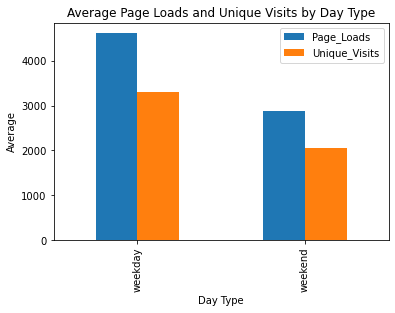

In [60]:
grouped=data.groupby('day_type')[['Page_Loads', 'Unique_Visits']].mean()


grouped.plot(kind='bar', title='Average Page Loads and Unique Visits by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Average')
plt.show()

In [40]:
data.head()

row_id Day varchar  Day_Of_Week  Page_Loads  Unique_Visits  \
Date                                                                     
2014-09-14       1      Sunday            1        2146           1582   
2014-09-15       2      Monday            2        3621           2528   
2014-09-16       3     Tuesday            3        3698           2630   
2014-09-17       4   Wednesday            4        3667           2614   
2014-09-18       5    Thursday            5        3316           2366   

            First_Time_Visits  Returning_Visits day_type  
Date                                                      
2014-09-14               1430               152  weekend  
2014-09-15               2297               231  weekday  
2014-09-16               2352               278  weekday  
2014-09-17               2327               287  weekday  
2014-09-18               2130               236  weekday

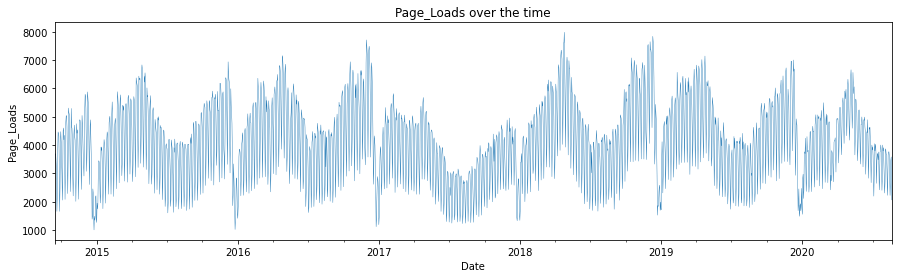

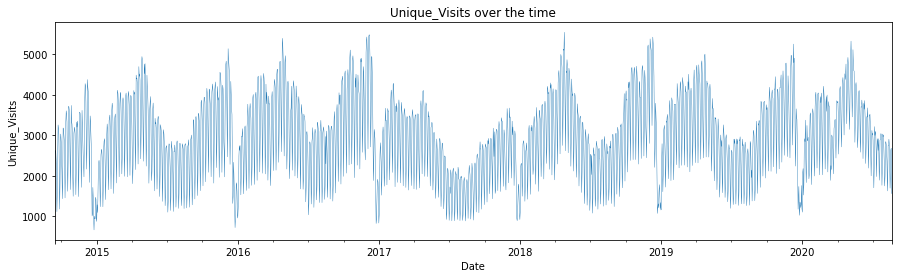

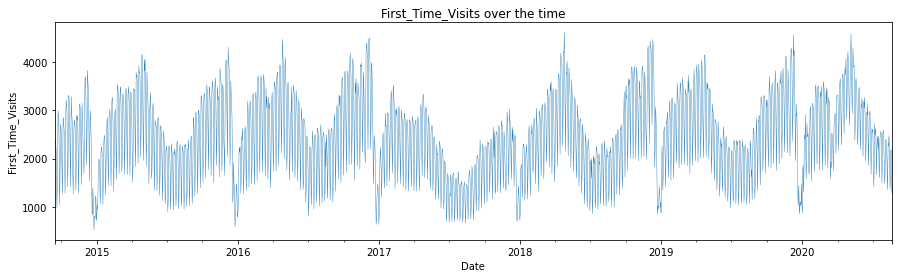

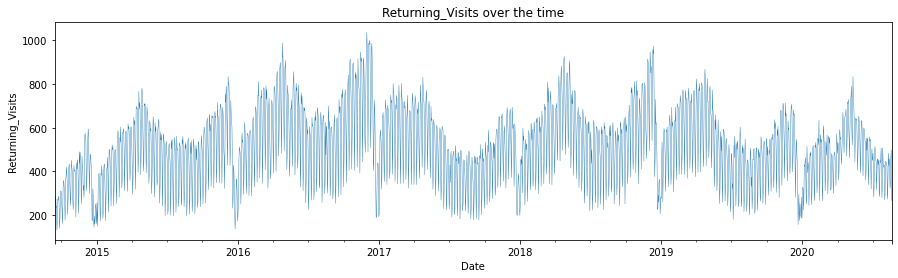

In [116]:
list_1=["Page_Loads","Unique_Visits","First_Time_Visits","Returning_Visits"]
for i in list_1:
    plt.figure(figsize=(15,4))
    data[i].plot(linewidth=0.4)
    plt.xlabel("Date")
    plt.ylabel(i)
    plt.title(f"{i} over the time")
    plt.show()

In [62]:
df.columns

Index(['row_id', 'Day', 'Day_Of_Week', 'Date', 'Page_Loads', 'Unique_Visits',
       'First_Time_Visits', 'Returning_Visits'],
      dtype='object')

Is there any variation in website traffic based on the day of the week or specific dates (e.g., holidays)?

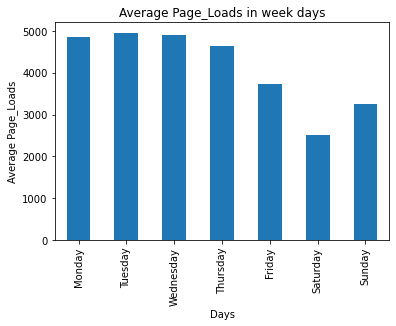

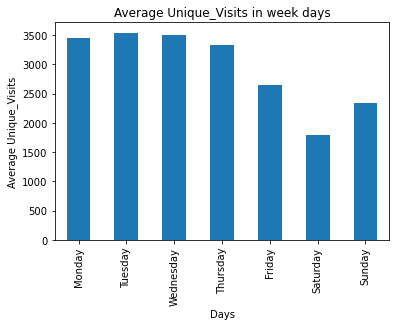

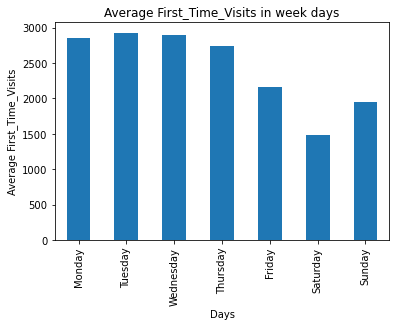

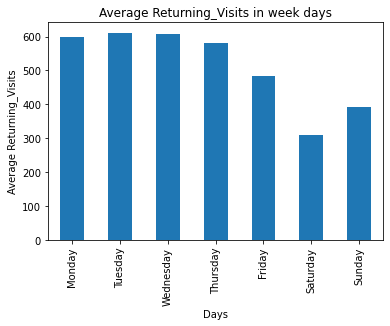

In [72]:
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

for i in list_1:
    grouped=df.groupby("Day")[i].mean().reindex(weekday_order)
    grouped.plot(kind="bar",title=f"Average {i} in week days")
    plt.xlabel("Days")
    plt.ylabel(f"Average {i}")
    plt.show()

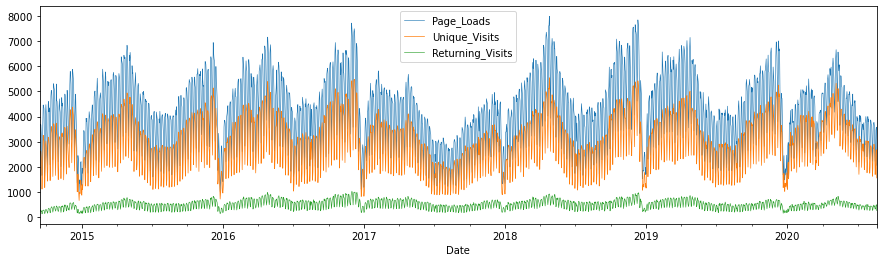

In [115]:
plt.figure(figsize=(15,4))
data["Page_Loads"].plot(linewidth=0.6)
data["Unique_Visits"].plot(linewidth=0.7)
data["Returning_Visits"].plot(linewidth=0.6)
plt.legend()
plt.show()

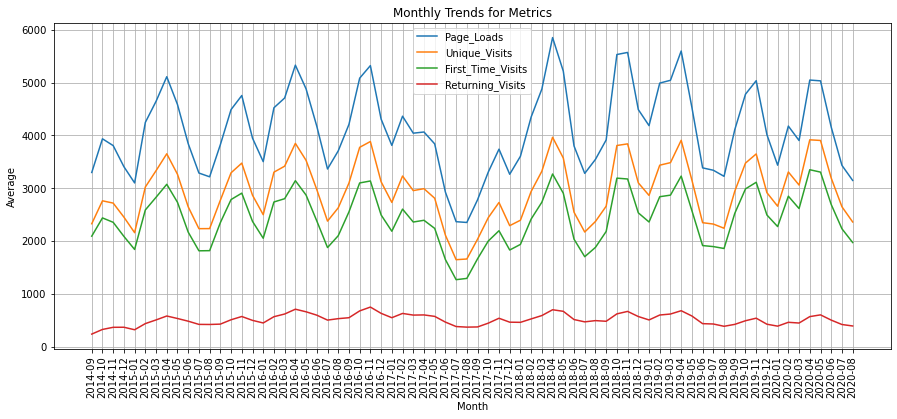

In [95]:
data["month"]=data.index.to_period("M").astype('str')

# Group the data by month and calculate the mean for each metric
grouped = data.groupby('month')[list_1].mean()

# Create separate line plots for each metric
plt.figure(figsize=(15, 6))
for i in list_1:
    plt.plot(grouped.index, grouped[i], label=i)

plt.title('Monthly Trends for Metrics')
plt.xlabel('Month')
plt.ylabel('Average')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

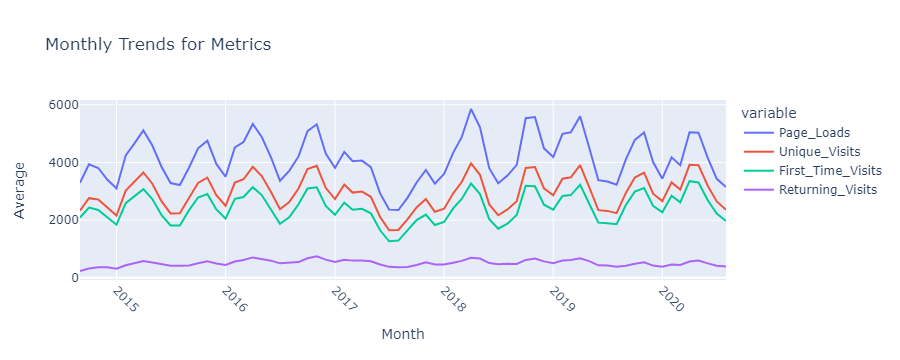

In [104]:
import pandas as pd
import plotly.express as px

data['Month'] = data.index.to_period('M').astype('str')  # Convert Period objects to strings

# Specify the metrics you want to plot

# Group the data by month and calculate the mean for each metric
grouped = data.groupby('Month')[list_1].mean().reset_index()

# Create a line plot using Plotly
fig = px.line(
    grouped,
    x='Month',
    y=list_1,
    title='Monthly Trends for Metrics',
    labels={'Month': 'Month', 'value': 'Average'},
    template='plotly',
)

fig.update_xaxes(tickangle=45)  # Rotate x-axis labels for better readability

fig.show()


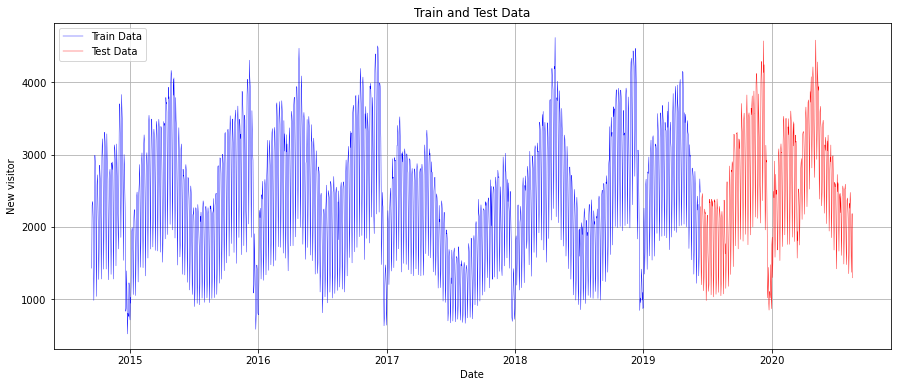

In [111]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_size = 0.8  
train, test = train_test_split(data, test_size=1 - train_size, shuffle=False)

# Plot both the training and testing sets in a single flow
plt.figure(figsize=(15, 6))

# Plot the training data
plt.plot(train['First_Time_Visits'], label='Train Data', color='blue',linewidth=0.4)

# Plot the testing data
plt.plot(test['First_Time_Visits'], label='Test Data', color='red',linewidth=0.4)

plt.title('Train and Test Data')
plt.xlabel('Date')
plt.ylabel('New visitor')  # Replace with the actual metric name
plt.legend()
plt.grid(True)
plt.show()

